In [9]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [10]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.drop('RowNumber',axis= 1,inplace =True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df['Male'] = pd.get_dummies(df['Gender'],drop_first=True)

In [15]:
df =pd.concat([df,df['Geography'].str.get_dummies()],axis =1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [16]:
df.drop(['CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [18]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)


In [21]:
x.shape

(10000, 12)

In [22]:
from keras.metrics import Precision, Recall


In [24]:
model = Sequential()
model.add(Dense(activation='relu',input_shape=(12,), units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_8 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_10 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_11 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 49        
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
__________________________________________________

In [27]:
h = model.fit(xtrain,ytrain,epochs=200,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
7500/7500 [==============================] - 2s 322us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/200
7500/7500 [==============================] - 1s 167us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/200
7500/7500 [==============================] - 1s 168us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/200
7500/7500 [==============================] - 1s 169us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 5/200
7500/7500 [==============================] - 1s 170us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 6/200
7500/7500 [==============================] - 1s 170us/step - loss: 3.2494 - accuracy: 0.7984 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 7/200
7500/7500 [=====

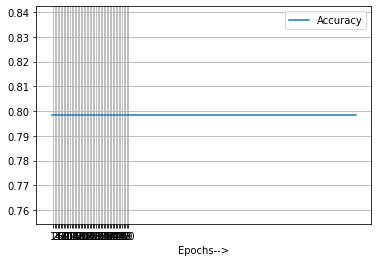

In [32]:
plt.plot(h.history['accuracy'])
plt.legend(['Accuracy']) 
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()

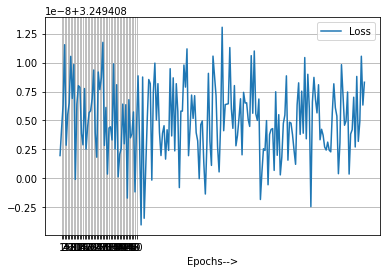

In [33]:
plt.plot(h.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()